In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
train_file='D:\\My Personal Documents\\Learnings\\Data Science\\Data Sets\\Big Mart Sale\\Train_UWu5bXk.csv'
test_file='D:\\My Personal Documents\\Learnings\\Data Science\\Data Sets\\Big Mart Sale\\Test_u94Q5KV.csv'
train=pd.read_csv(train_file)
test=pd.read_csv(test_file)

In [3]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train['Store_Age']=2013-train.Outlet_Establishment_Year

In [6]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [8]:
train.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [9]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [10]:
train.Item_Fat_Content=train.Item_Fat_Content.map({'Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [11]:
train.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [12]:
test.Item_Type.unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

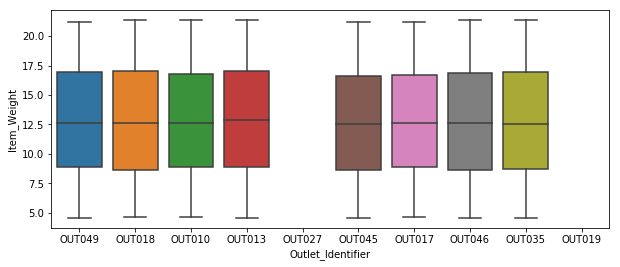

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
sb.boxplot(y='Item_Weight',x='Outlet_Identifier',data=train)

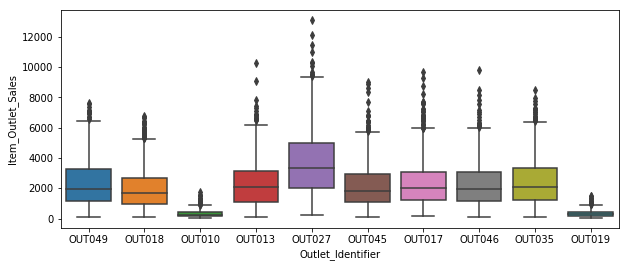

In [14]:
fig, ax = plt.subplots(figsize=(10,4))
sb.boxplot(y='Item_Outlet_Sales',x='Outlet_Identifier',data=train)

In [15]:
train.loc[(train.Outlet_Type=='Grocery Store') ,'Outlet_Size']='Small'


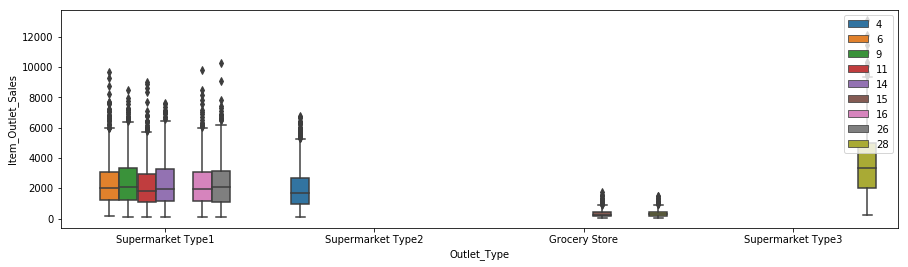

In [16]:
fig, ax = plt.subplots(figsize=(15,4))
sb.boxplot(y='Item_Outlet_Sales',x='Outlet_Type',hue='Store_Age',data=train)
plt.legend(loc='upper right')

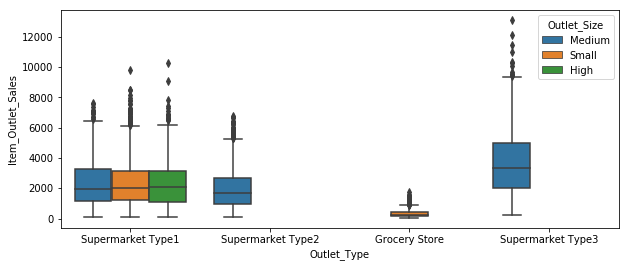

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
sb.boxplot(y='Item_Outlet_Sales',x='Outlet_Type',hue='Outlet_Size',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

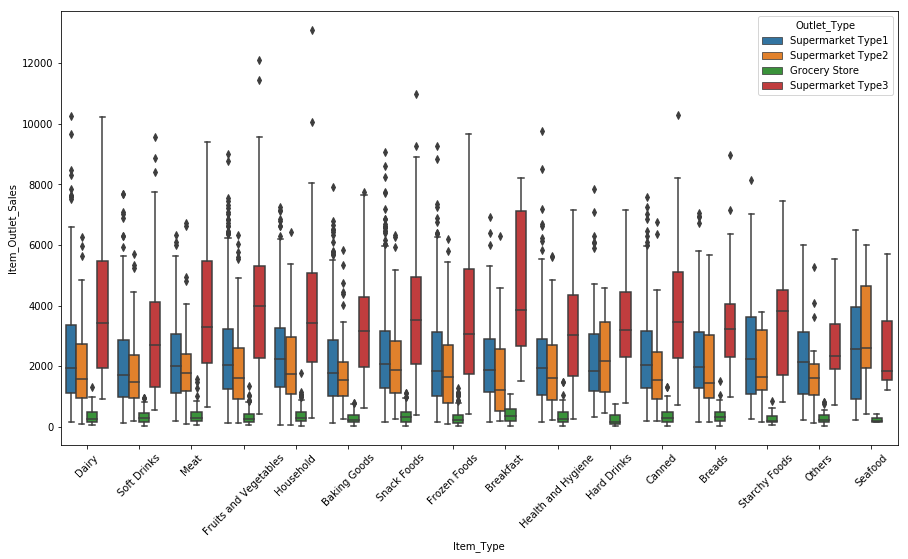

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
sb.boxplot(y='Item_Outlet_Sales',x='Item_Type',hue='Outlet_Type',data=train)
plt.xticks(rotation=45)

In [19]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Store_Age                       0
dtype: int64

In [20]:
train[train.Item_Identifier=='FDW14'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Store_Age
4979,FDW14,8.3,Regular,0.038212,Dairy,87.7198,OUT046,1997,Small,Tier 1,Supermarket Type1,1569.9564,16
6270,FDW14,8.3,Regular,0.038367,Dairy,87.1198,OUT018,2009,Medium,Tier 3,Supermarket Type2,959.4178,4
8033,FDW14,8.3,Regular,0.038204,Dairy,87.7198,OUT035,2004,Small,Tier 2,Supermarket Type1,1831.6158,9


In [25]:
Item_Max_Weight=train.groupby(['Item_Identifier'])['Item_Weight'].max().reset_index()
#Item_Max_Weight=pd.DataFrame(Item_Max_Weight)

In [31]:
def weight_impute(df):
    if pd.isnull(df['Item_Weight']):
        return Item_Max_Weight['Item_Weight']
    else:
        return df['Item_Weight']
        

In [32]:
train['Item_Weight1']=train.apply(weight_impute,axis=1)


In [35]:
train[pd.isnull(train.Item_Weight)].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Store_Age,Item_Weight1
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,28,"[11.6, 19.35, 8.27, 7.39, 6.115, 8.785, 12.3, ..."
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,28,"[11.6, 19.35, 8.27, 7.39, 6.115, 8.785, 12.3, ..."
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,28,"[11.6, 19.35, 8.27, 7.39, 6.115, 8.785, 12.3, ..."
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,28,"[11.6, 19.35, 8.27, 7.39, 6.115, 8.785, 12.3, ..."
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,28,"[11.6, 19.35, 8.27, 7.39, 6.115, 8.785, 12.3, ..."
